In [33]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt 
data=pd.read_excel('molefraction.xlsx')
dataPT=pd.read_excel('inputPT.xlsx')
kij=pd.read_excel('kij.xlsx')
T=np.array(dataPT['T']) #Kelvin
P=np.array(dataPT['P']) #bar
R=8.314472*10**(-5) #m3*bar/mol*K
Tc=np.array(data['Tc']) #Kelvin
Pc=np.array(data['Pc']) #bar
w=np.array(data['w'])
z=np.array(data['z'])
Zfactor_exp=np.array(dataPT['Zexp'])

In [34]:
v=[]
Zfactor=[]
for n in range (0,len(T)):
    a=[]
    b=[]
    α=[]
    for i in range (0,len(w)):
        b=np.append(b,(z[i]*0.0778*R*Tc[i])/Pc[i])
        if w[i]<=0.491:
            m=0.37464+1.54226*w[i]-0.26992*w[i]*w[i]
            α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T[n]/Tc[i])))**2)
        else:
            m=0.379642+1.48503*w[i]-0.164423*w[i]*w[i]+0.016666*w[i]*w[i]*w[i]
            α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T[n]/Tc[i])))**2)
    for i in range (0,len(Tc)): 
        for j in range(0,len(Tc)):
            a=np.append(a,z[i]*z[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j]))
    am=np.sum(a)
    bm=np.sum(b)
    A=(am*P[n])/(R*R*T[n]*T[n])
    B=(bm*P[n])/(R*T[n])
    Zro=np.array([1,B-1,A-2*B-3*(B*B),(B**3)+(B**2)-A*B])
    Zro=np.roots(Zro)
    Real=[]
    for i in range(len(Zro)):
        if abs(Zro[i].imag)<10**(-5):
            Real=np.append(Real, np.real(Zro[i]))
            if len(Real)>1:
                print ('two phases')
            else:
                Zsingle=Real[0]
                vsingle=Zsingle*R*T[n]/P[n]
                print ('single phase')
    Zfactor=np.append(Zfactor,Zsingle)
    v=np.append(v,vsingle*10**6)


            


single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase
single phase


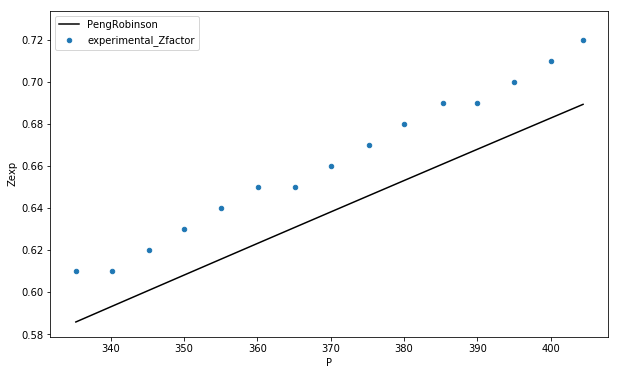

In [35]:
dataPT.plot(kind='scatter',x='P',y='Zexp',figsize=[10,6])
plt.plot(P,Zfactor,color='black')
plt.legend(['PengRobinson','experimental_Zfactor'])

AttributeError: Unknown property x

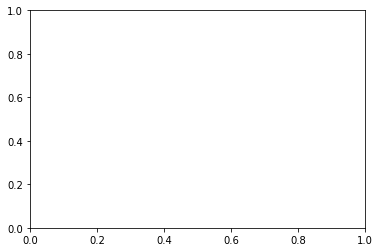

In [38]:
plt.plot(P,v,color='black')
plt.legend(['PengRobinson'])